<a href="https://colab.research.google.com/github/Swapnil-417/Cardiovascular-Risk-Prediction/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether the patient has a 10-year risk of future coronary heart disease (CHD) </u></b>

# **Problem Description**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient’s information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Data Description**

**Demographic:**
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **CigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
* **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
* **PrevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
* **PrevalentHyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **TotChol**: total cholesterol level (Continuous)
* **SysBP**: systolic blood pressure (Continuous)
* **DiaBP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **HeartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

## **Importing Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
dir_path= "/content/drive/MyDrive/Capstone Projects/Cardiovascular Risk Prediction - Swapnil Patil/data/"
data= pd.read_csv(dir_path + "data_cardiovascular_risk.csv")

# **Data Exploration**

In [3]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
data .tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [5]:
data.shape

(3390, 17)

In [6]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Data Inspection**


In [8]:
# checking for duplicate values
data.duplicated().sum()

0

**Checking missing values and taking required actions**

In [9]:
# checking the columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]
data[columns_with_missing_values].isnull().sum()

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [10]:
data[data['glucose'].isnull()].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0


glucose has a relation with diabetes and we will see it

In [11]:
data[data['diabetes']== 0].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [12]:
data[data['diabetes']== 1].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


We can see non-diabetic person has glucose less than 100 whereas diabetic person has glucose above 100. Since, diabetes column do not have any null value so we will use it in filling missing values of glucose column

In [13]:
# mean glucose of non-diabetic person
mean_glu0 = int(data[data['diabetes']== 0]['glucose'].mean())
mean_glu0

79

In [14]:
# mean glucose of diabetic person
mean_glu1 = int(data[data['diabetes']== 1]['glucose'].mean())
mean_glu1

171

In [15]:
# filling null values of glucose column
cond = data['diabetes'] == 1
data['glucose'] = data['glucose'].fillna(cond.map({True:mean_glu1, False: mean_glu0}))

The other features have very few missing entries and could be dropped without losing a lot of data.

In [16]:
# droping missing values
data = data.dropna()

In [17]:
data.isnull().any()

id                 False
age                False
education          False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

There are no any missing values present in the dataset. Also, id column is not so useful for us so droping it.

In [18]:
data = data.drop(['id','education'], axis=1)

In [19]:
data.dtypes

age                  int64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [20]:
# change dtypes
data = data.astype({'BPMeds':int, 'cigsPerDay':int})

In [21]:
new_df = data.rename(columns={'sex':'gender'})

In [22]:
new_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [23]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5
BMI,3189.0,25.774569,4.132848,15.96,22.94,25.37,27.99,56.8


From statistical overview of the dataset, we infer that some data features are binary, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for 'totChol' and 'sysBP'. This suggests the presence of outliers in the data.

**Checking Outliers**

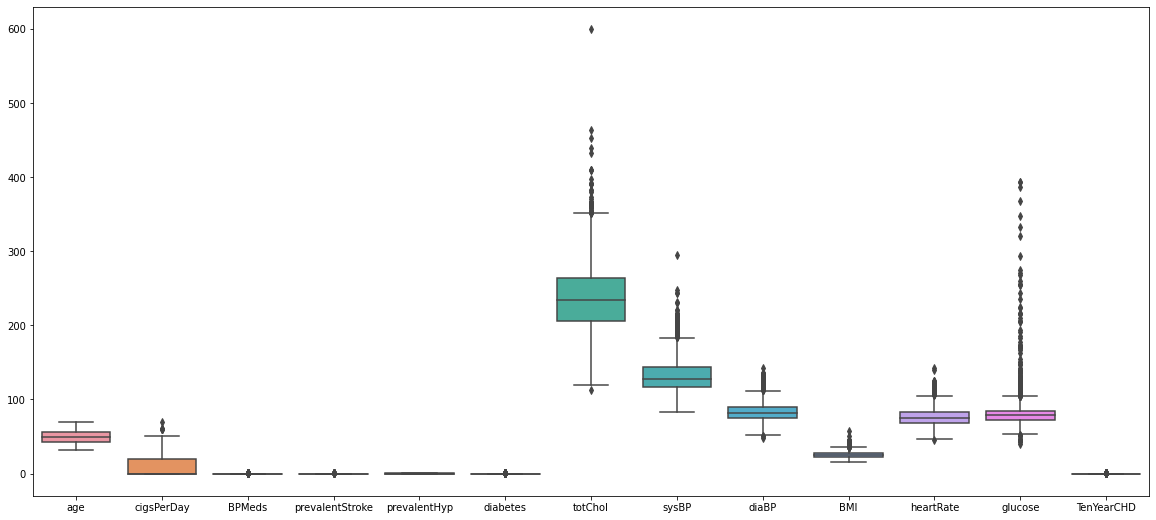

In [24]:
plt.figure(figsize=(20,9))
sns.boxplot(data=new_df)
plt.show()

We can see there are outliers in some features but it can be normal for these features to have high values and they will be useful. We will drop extreme outliers from some of the columns.

In [25]:
# droping outliers from totChol column above 500
new_df= new_df.drop(new_df[new_df['totChol']>500].index)

In [26]:
# droping outliers from sysBP column above 250
new_df=new_df.drop(new_df[new_df['sysBP']>250].index)

# **Exploratory Data Analysis**

## **Dependent Variable**

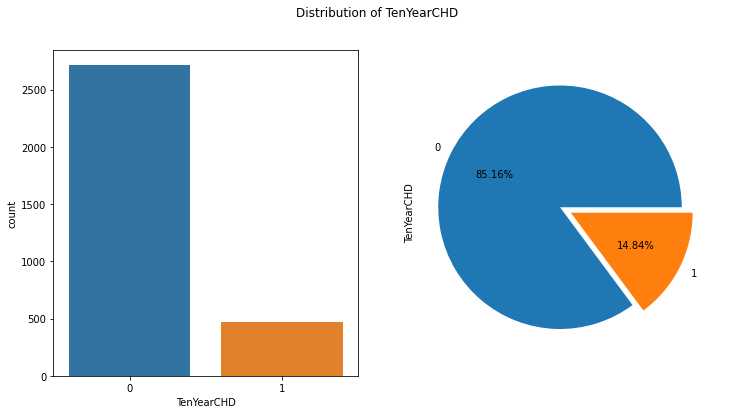

In [27]:
# Distribution of target variable
plt.subplots(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=new_df['TenYearCHD'])

plt.subplot(1, 2, 2)
new_df['TenYearCHD'].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1,0])

plt.suptitle("Distribution of TenYearCHD")
plt.show()

The distribution is highly imbalanced. We can see, the count of patients at risk is very less as compared to no risk patients. This would lead to class imbalance problem while fitting our models.

## **Univariate Analysis**

**Continuous Variables**

In [28]:
# continuous variables
cont_var= ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

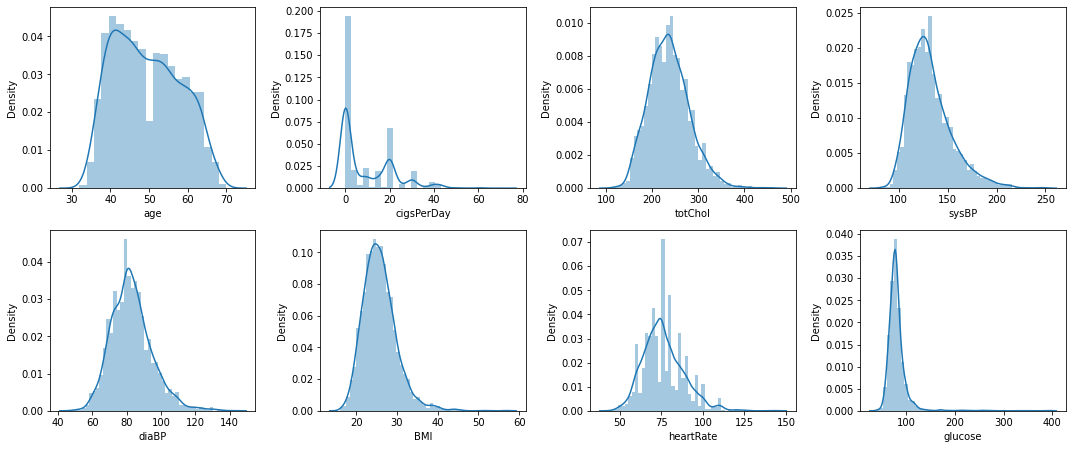

In [29]:
# check distribution
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l))/2
    number_of_rows = 2
    
    plt.figure(figsize=(15,9))
    for i in range(1,len(l)+1):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(df[l[i-1]],kde=True) 
        plt.tight_layout()
        
check_dist(new_df[cont_var])

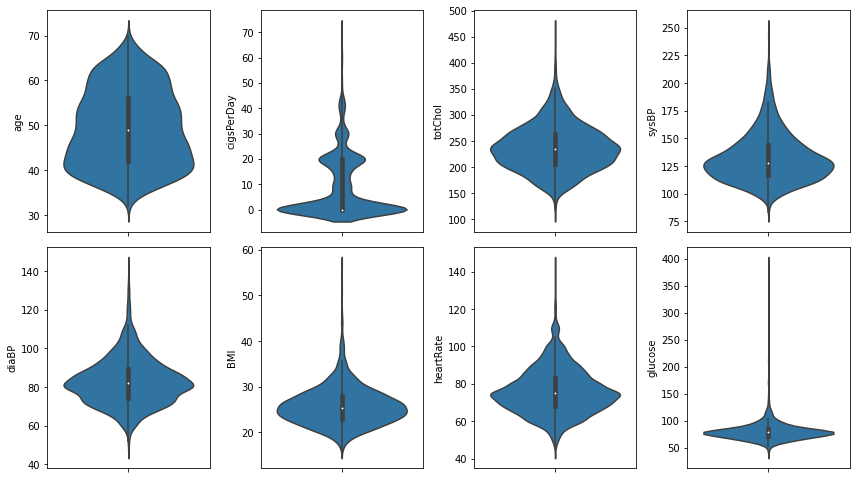

In [30]:
# violinplot
l = new_df[cont_var].columns.values
number_of_columns=(len(l))/2
number_of_rows = 2

plt.figure(figsize=(12,10))
for i in range(1,len(l)+1):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    sns.violinplot(y=new_df[cont_var][l[i-1]])
    plt.tight_layout()

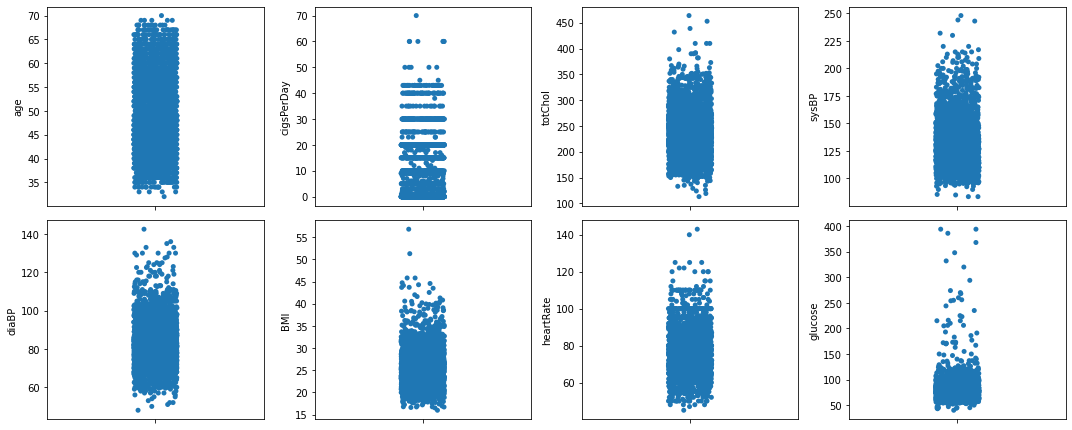

In [31]:
# stripplot
l = new_df[cont_var].columns.values
number_of_columns=(len(l))/2
number_of_rows = 2

plt.figure(figsize=(15,9))
for i in range(1,len(l)+1):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    sns.stripplot(y=new_df[cont_var][l[i-1]]) 
    plt.tight_layout()

**Categorical Variables**

In [32]:
# categorical or binary variables
cat_var= ['gender','is_smoking', 'BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [33]:
# unique values 
print("unique values:")
for col in cat_var:
  print(f"{col} - {new_df[col].unique()}")
  print("-"*25)

unique values:
gender - ['M' 'F']
-------------------------
is_smoking - ['NO' 'YES']
-------------------------
BPMeds - [0 1]
-------------------------
prevalentStroke - [0 1]
-------------------------
prevalentHyp - [1 0]
-------------------------
diabetes - [0 1]
-------------------------


In [34]:
for col in cat_var:
  print(f"{col} - value counts")
  print(new_df[col].value_counts())
  print("-"*30)

gender - value counts
F    1794
M    1393
Name: gender, dtype: int64
------------------------------
is_smoking - value counts
NO     1608
YES    1579
Name: is_smoking, dtype: int64
------------------------------
BPMeds - value counts
0    3093
1      94
Name: BPMeds, dtype: int64
------------------------------
prevalentStroke - value counts
0    3168
1      19
Name: prevalentStroke, dtype: int64
------------------------------
prevalentHyp - value counts
0    2190
1     997
Name: prevalentHyp, dtype: int64
------------------------------
diabetes - value counts
0    3107
1      80
Name: diabetes, dtype: int64
------------------------------


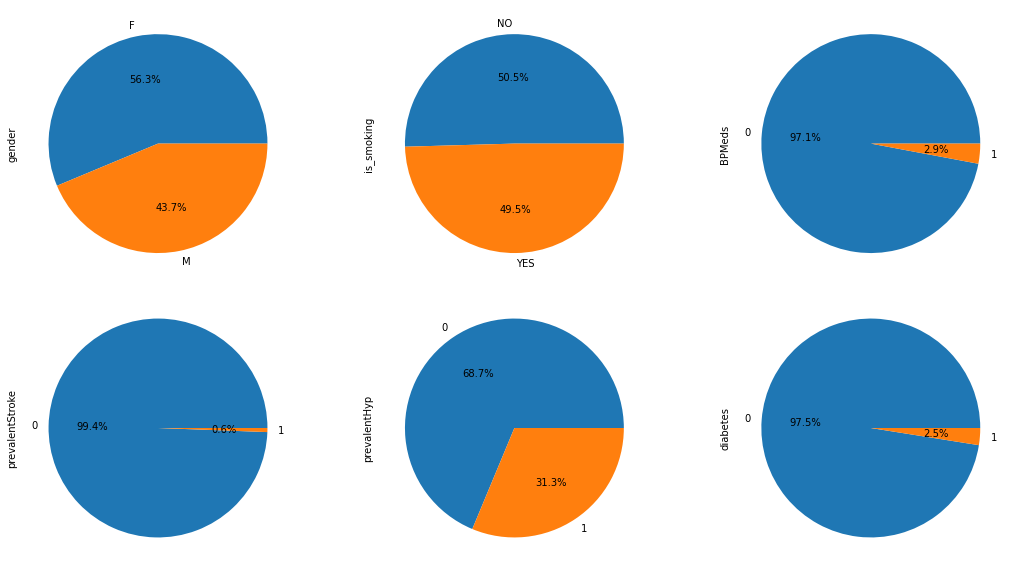

In [35]:
# pie chart
l = new_df[cat_var].columns.values
number_of_columns=(len(l))/2
number_of_rows = 2

plt.figure(figsize=(15,12))
for i in range(1,len(l)+1):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    new_df[cat_var][l[i-1]].value_counts().plot.pie(autopct= '%1.1f%%') 
    plt.tight_layout()

"BPMeds", "prevalentStroke" and "diabetes" are highly imbalanced. This feature will not have much contribution in predicting target variable.

## **Bivariate Analysis**

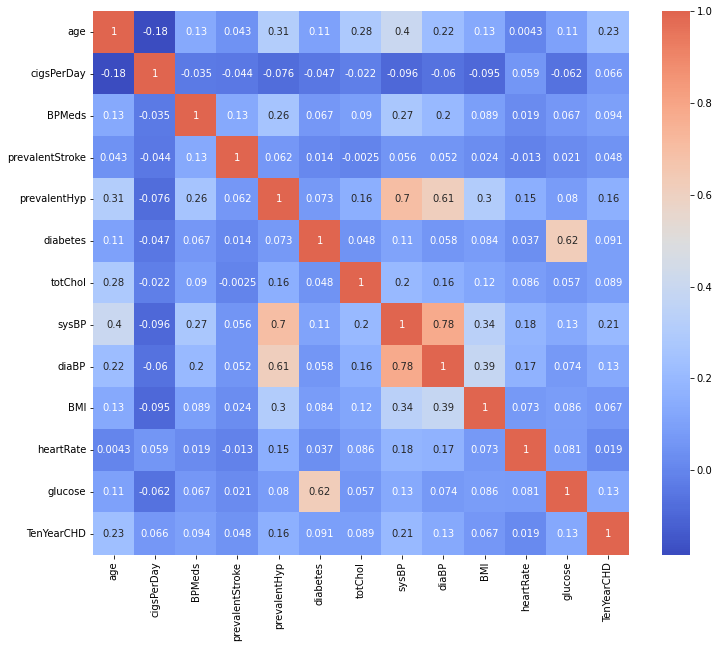

In [36]:
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', ax=axes, center=0.5)
plt.show()

**Continuous Variables**

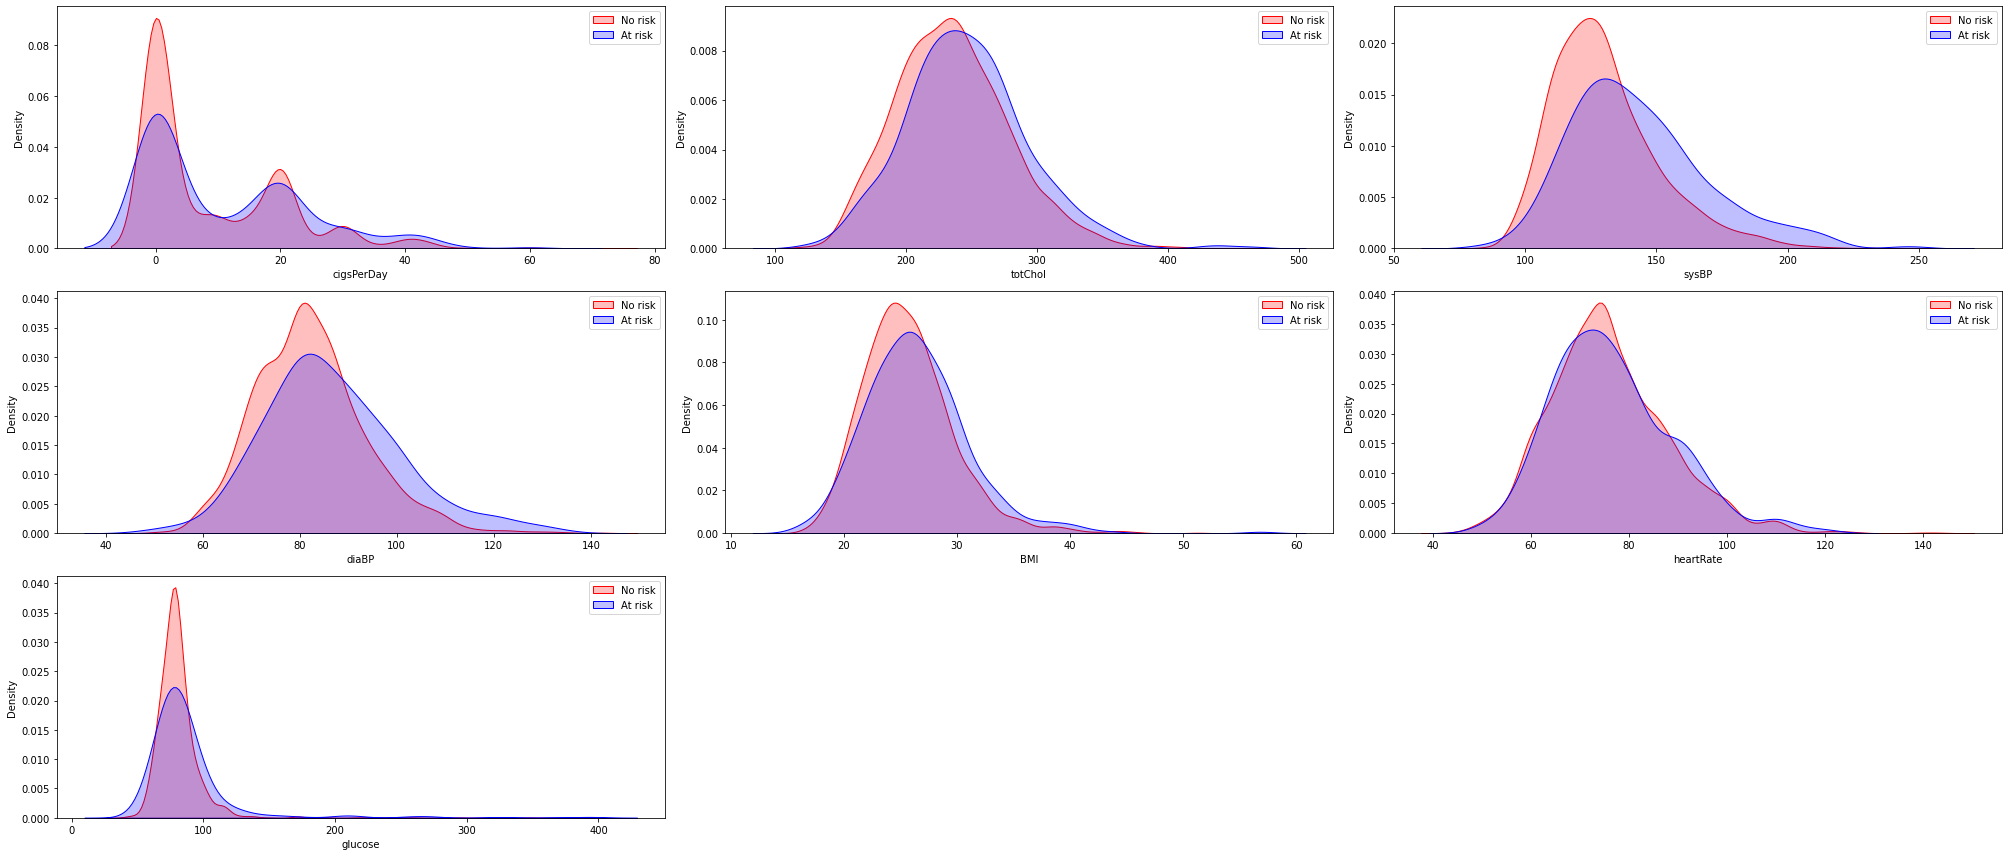

In [37]:
# Which continuous variables are risk factors
l = cont_var
number_of_columns=(len(l)-1)/2
number_of_rows = 2

plt.figure(figsize=(8*number_of_columns,6*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    fig = sns.kdeplot(new_df[l[i]][new_df['TenYearCHD'] == 0], shade=True, color="r", label='No risk')
    fig = sns.kdeplot(new_df[l[i]][new_df['TenYearCHD'] == 1], shade=True, color="b",label='At risk')
    plt.legend()
    plt.tight_layout()

There is no direct correlation of coronary heart disease with the BMI, heartrate and glucose.

Patients at risk have a slight increase in cholesterol

Patients having higher sysBP and DiaBP tends to have high risk of Coronary heart disease.

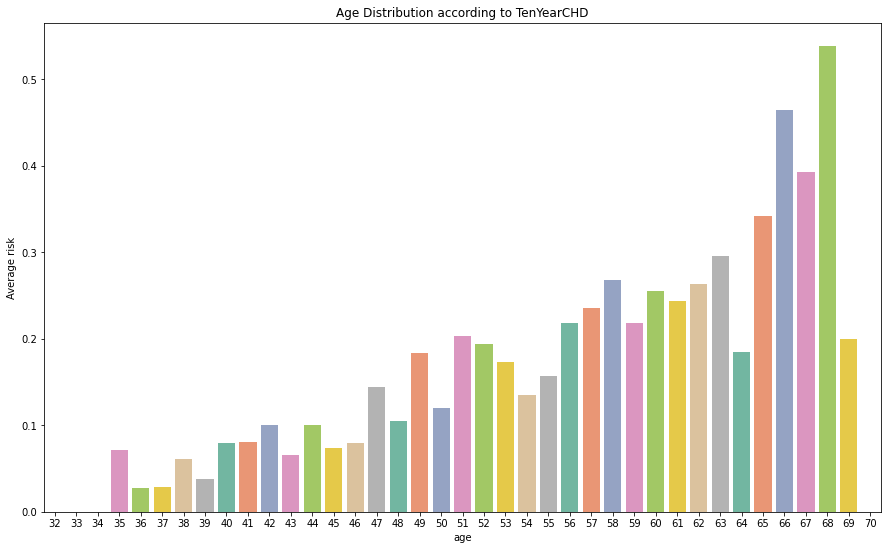

In [38]:
# which age has most risk
temp1_df= new_df.groupby("age", as_index=False).TenYearCHD.mean()

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(x='age', y='TenYearCHD', data=temp1_df, palette='Set2')
ax.set_title("Age Distribution according to TenYearCHD")
plt.ylabel("Average risk")
plt.show()

The average of diseased patients increases with increasing age. The peoples of age above 55 have high risk of contracting disease and the risk increases with age.

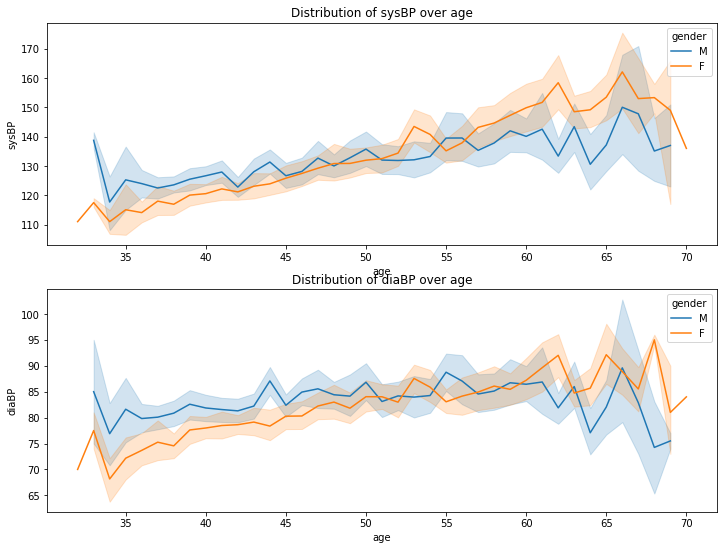

In [39]:
# Distribution of sysBP and diaBP over age in relation to gender
plt.subplots(figsize=(12, 9))

plt.subplot(2,1,1)
sns.lineplot(data=new_df, x="age", y='sysBP', hue="gender")
plt.title("Distribution of sysBP over age")

plt.subplot(2,1,2)
sns.lineplot(data=new_df, x="age", y='diaBP', hue="gender")
plt.title("Distribution of diaBP over age")

plt.show()

Womens of above 50 age have higher systolic BP as compared to men thus increasing risk of disease.

**Categorical Variables**

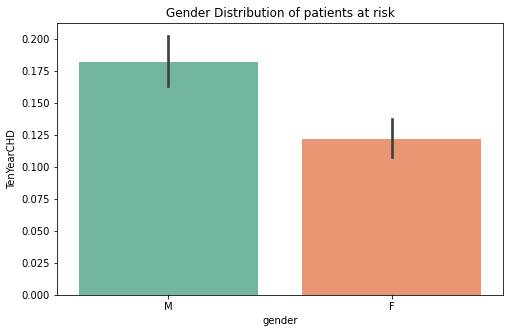

In [40]:
# which gender has most risk of CHD
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x='gender',y='TenYearCHD', data=new_df, palette='Set2')
ax.set_title("Gender Distribution of patients at risk")
plt.show()

According to this dataset, men have higher risk of contracting coronary heart disease.

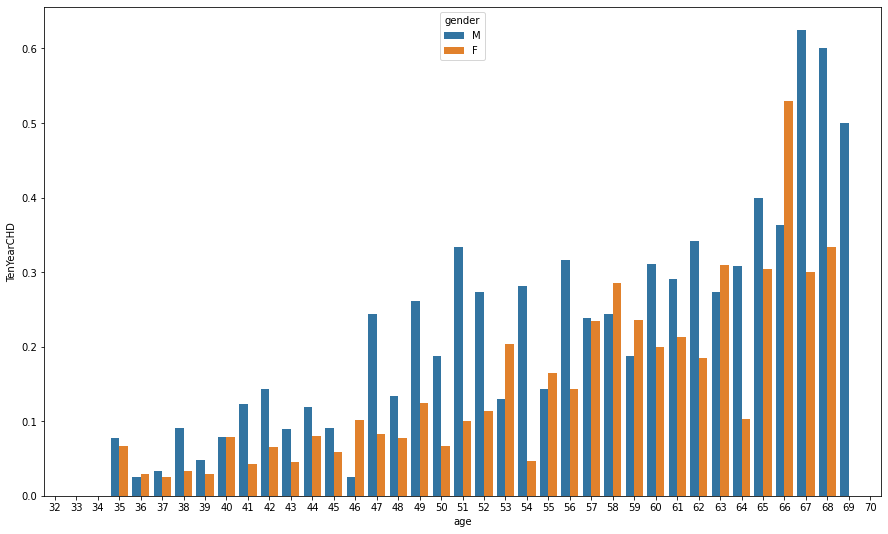

In [41]:
# Distribution of age according to gender over TenYearCHD
plt.figure(figsize=(15,9))
sns.barplot(x='age', y='TenYearCHD', data=new_df,
                 hue= 'gender',ci=None);

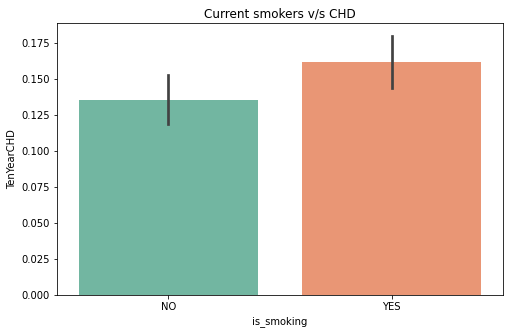

In [42]:
# Does smokers have risk of CHD
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='is_smoking',y='TenYearCHD', data=new_df, palette='Set2')
ax.set_title("Current smokers v/s CHD")
plt.show()

Current smokers have high risk of contracting coronary heart disease than non smokers.

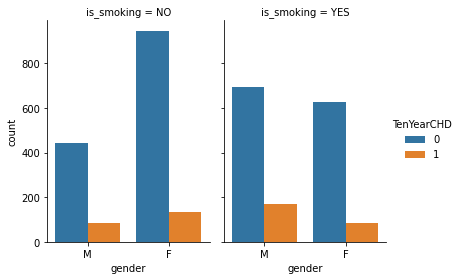

In [43]:
# Distribution of smokers according to gender over TenYearCHD

sns.catplot(x="gender", hue="TenYearCHD", col="is_smoking",
                data=new_df, kind="count", height=4, aspect=.7)
plt.show()

There are more male smokers than females. Thus, male have higher risk of contracting coronary heart diease.

**Binary Variables**

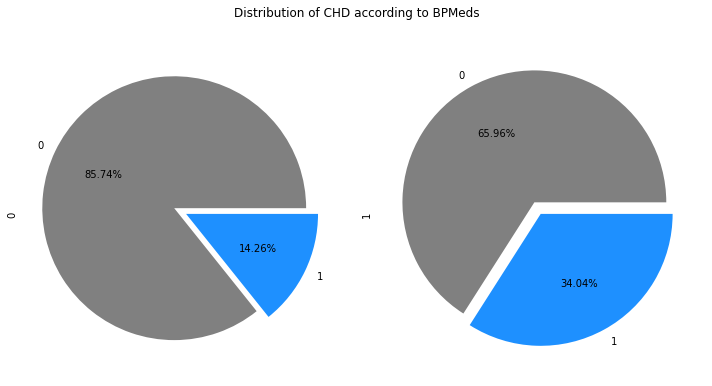

In [44]:
# Risk of CHD to a patient on BP medication
bp_df= new_df.groupby(['BPMeds', 'TenYearCHD']).size().reset_index().pivot(
                            columns='BPMeds', index='TenYearCHD', values=0)

colors = ['grey', 'dodgerblue']
bp_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
           autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to BPMeds")
plt.tight_layout()
plt.show()

The risk of getting Coronary Heart Disease for a patient on BP medication is 34% whereas, a patient having no BP medication has only 14% of risk.

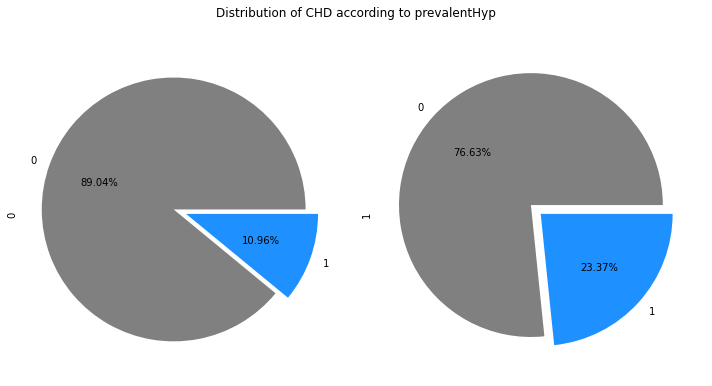

In [45]:
# Risk of CHD to a patient having hypertension
prevstroke_df= new_df.groupby(['prevalentHyp', 'TenYearCHD']).size().reset_index().pivot(
                                    columns='prevalentHyp', index='TenYearCHD', values=0)

prevstroke_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
           autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to prevalentHyp")
plt.tight_layout()
plt.show()

If a patient is hypertensive then the risk of contracting Coronary Heart Disease is 37% whereas, a patient with no hypertension has only 10% of risk.

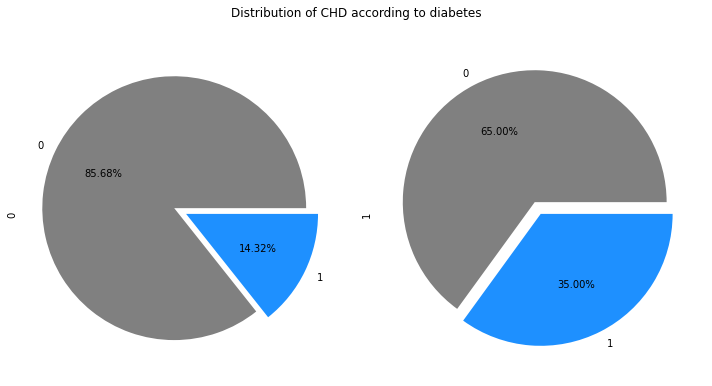

In [46]:
# Risk of CHD to a diabetic patient 
diabetes_df= new_df.groupby(['diabetes', 'TenYearCHD']).size().reset_index().pivot(
                                    columns='diabetes', index='TenYearCHD', values=0)

diabetes_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
           autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to diabetes")
plt.tight_layout()
plt.show()

The risk of getting Coronary Heart Disease to a diabetic patient is 35% whereas, non-diabetic patient has only 14% of risk.

# **Feature Engineering**

In [47]:
new_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [48]:
# Converting categorical data to numeric data
new_df['gender'] = new_df['gender'].apply(lambda x: 1 if x=='M' else 0)
new_df['is_smoking'] = new_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [49]:
new_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **Feature Selection**

Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.

**SelectKBest method to select top most important features**

In [50]:
# spliting features and target variable]
X = new_df.drop("TenYearCHD", axis=1)
y = new_df["TenYearCHD"]

In [51]:
from sklearn.feature_selection import SelectKBest, chi2

In [52]:
selector = SelectKBest(chi2, k=10)
best_fit = selector.fit(X,y)
best_features = list(X.columns[selector.get_support(indices=True)])
print(best_features)

['age', 'gender', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'glucose']


In [53]:
scores_df = pd.DataFrame(columns=['feature','score'])
scores_df['feature'] = X.columns
scores_df['score'] = best_fit.scores_
print(scores_df.nlargest(11,'score'))

         feature       score
9          sysBP  496.009964
13       glucose  336.742193
0            age  247.589491
3     cigsPerDay  216.430560
8        totChol  208.602928
10         diaBP   98.097285
6   prevalentHyp   57.377337
4         BPMeds   27.420105
7       diabetes   25.721582
1         gender   12.684687
11           BMI    9.418666


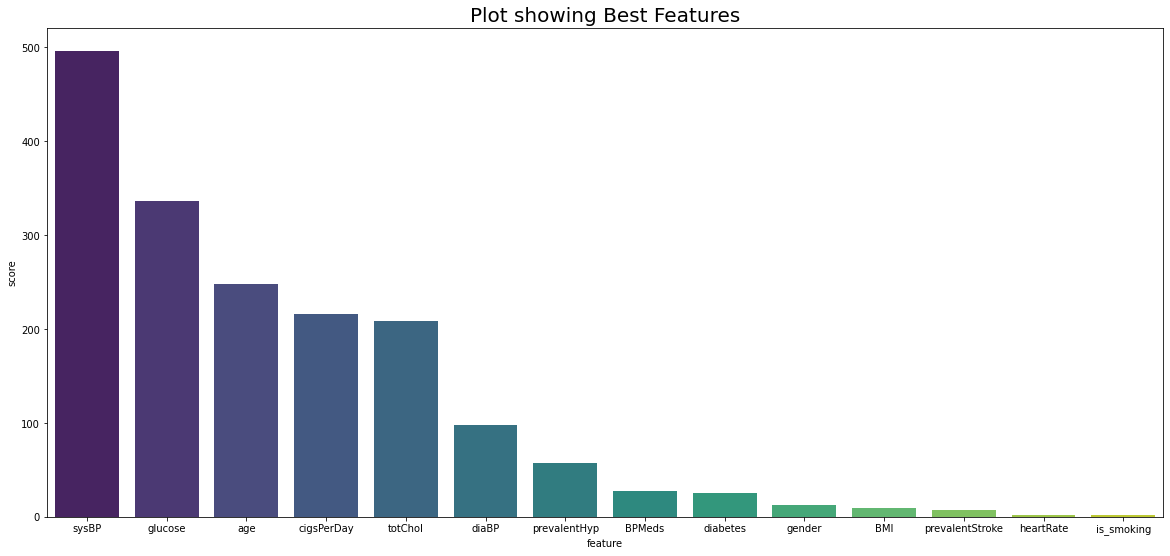

In [54]:
# visualizing feature selection
scores_df=scores_df.sort_values(by="score", ascending=False)
plt.figure(figsize=(20,9), facecolor='w')
sns.barplot(x='feature',y='score',data=scores_df,palette='viridis')
plt.title("Plot showing Best Features", size=20)
plt.show()

In [55]:
print(best_features)

['age', 'gender', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'glucose']


droping 'BPMeds' and 'diabetes' features as we saw they are highly imbalanced so we will select only 8 features from top 10 features

**Selecting best 8 features**

In [56]:
new_df=new_df[['age', 'gender', 'cigsPerDay', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'glucose', "TenYearCHD"]]
new_df.head()

,age,gender,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,glucose,TenYearCHD
1,36,1,0,1,212.0,168.0,98.0,75.0,0
2,46,0,10,0,250.0,116.0,71.0,94.0,0
3,50,1,20,1,233.0,158.0,88.0,94.0,1
4,64,0,30,0,241.0,136.5,85.0,77.0,0
5,61,0,0,1,272.0,182.0,121.0,65.0,1


### **Balancing the target variable**


Let's see how unbalanced the dataset is:

In [57]:
new_df.shape

(3187, 9)

Class 0: 2714
Class 1: 473
Proportion: 5.74 : 1


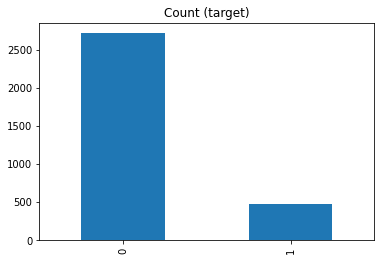

In [58]:
# Class count
count_class_0, count_class_1 = new_df['TenYearCHD'].value_counts()

print('Class 0:', count_class_0)
print('Class 1:', count_class_1)
print('Proportion:', round(count_class_0 / count_class_1, 2), ': 1')

new_df['TenYearCHD'].value_counts().plot(kind='bar', title='Count (target)');

Applying sampling method to deal with the imbalance problem.

In [59]:
# Divide by class
df_class_0 = new_df[new_df['TenYearCHD'] == 0]
df_class_1 = new_df[new_df['TenYearCHD'] == 1]

**Random over-sampling**

In [60]:
# random over sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
new_df = pd.concat([df_class_0, df_class_1_over], axis=0)

Random over-sampling:
0    2714
1    2714
Name: TenYearCHD, dtype: int64


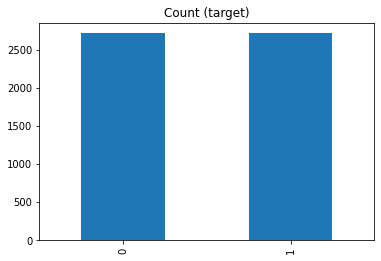

In [61]:
print('Random over-sampling:')
print(new_df['TenYearCHD'].value_counts())

new_df['TenYearCHD'].value_counts().plot(kind='bar', title='Count (target)');

In [62]:
new_df.reset_index(drop= True, inplace= True)

In [63]:
new_df.shape

(5428, 9)

## **Train Test Split and Scaling**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [65]:
X = new_df.drop("TenYearCHD", axis=1)
y = new_df['TenYearCHD']

In [66]:
# Spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [67]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Predictive Modeling**

**Defining funtions**

In [68]:
# creating function to calculate evaluation metrics
results = {}

def evaluation_metrics(y_act, y_pred, model=None):
  '''
      Takes actual target values and estimated target values as input
      and returns evaluation metrics as output
  '''

  print("Evaluation Metrics on test data:")

  # accuracy score
  acc = accuracy_score(y_act, y_pred)
  print(f"accuracy score: {acc}")

  # precision score
  prec = precision_score(y_act, y_pred)
  print(f"Precision: {prec}")

  # recall
  recall = recall_score(y_act, y_pred)
  print(f"Recall: {recall}")

  # f1 score
  f1 = f1_score(y_act, y_pred)
  print(f"f1 score: {f1}")

  # appending result into dictionary
  results[model]= [acc,prec,recall,f1]

In [69]:
# function to plot roc curve
def plot_roc_curve(y_act, pred_proba):

  ''' 
  This function computes and plots the receiver operating characteristic curve, or ROC curve.
  '''

  fpr, tpr, threshold = roc_curve(y_act, pred_proba)
  roc_auc = roc_auc_score(y_act, pred_proba)

  # Printing AUC
  print(f"roc-auc score: {roc_auc}")

  # Plotting the ROC
  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

  plt.plot([0,1], [0,1], color='orange', linestyle='--')

  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()

In [70]:
# function to plot feature importance
def plot_feature_importance(model,X):

  ''' plots feature importance graph '''


  importances = list(model.feature_importances_)

  feature_importances= {'feature':list(X.columns), 'feature_importance':importances}

  importance_df= pd.DataFrame(feature_importances)
  importance_df.sort_values(by='feature_importance', ascending=False, inplace=True)

  plt.figure(figsize=(12,6))
  sns.barplot(x='feature_importance', y='feature', data=importance_df)
  
  plt.xlabel("Importance")
  model_name= model.__class__.__name__
  plt.title(f"Feature Importance {model_name}",fontweight='bold', fontsize=15)
  plt.tight_layout()

  plt.show()

## **Logistic Regression**

In [71]:
# create logistic regression model
clf = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# fit model
lr_clf = clf.fit(X_train,y_train)

In [72]:
# predicted classes
train_pred_lr = lr_clf.predict(X_train)
test_pred_lr = lr_clf.predict(X_test)

In [73]:
# Predicted Probability
test_proba_lr = lr_clf.predict_proba(X_test)[:,1]

In [74]:
# train set accuracy score
accuracy_score(y_train,train_pred_lr)

0.667403586342422

### **Model Evaluation**

In [75]:
# Evaluation metrics
evaluation_metrics(y_test, test_pred_lr, "Logistic Regression")

Evaluation Metrics on test data:
accuracy score: 0.6904937361827561
Precision: 0.6885964912280702
Recall: 0.6946902654867256
f1 score: 0.6916299559471366


**Confusion Matrix**

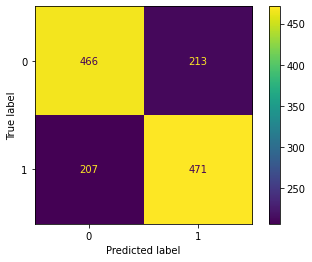

In [76]:
# visualize the confusion matrix
plot_confusion_matrix(lr_clf, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.7411732506158197


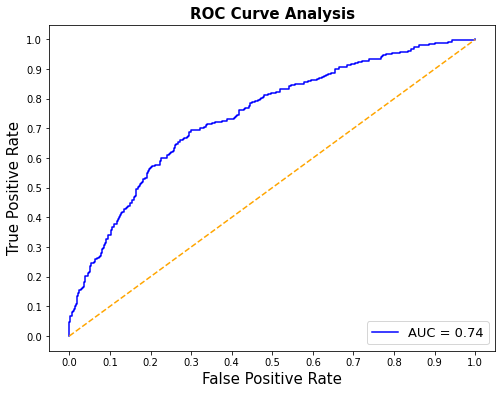

In [77]:
plot_roc_curve(y_test, test_proba_lr)

## **K-Nearest Neighbors (KNN)**

In [167]:
#create parameter grid
param_grid = {'n_neighbors': np.arange(16, 31)}

In [168]:
#create new a knn model
knn_clf = KNeighborsClassifier()

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_clf, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [169]:
#checking top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 16}

In [170]:
# optimal model
knn_optimal_model = knn_gscv.best_estimator_

In [171]:
# predicted classes
train_pred_knn = knn_optimal_model.predict(X_train)
test_pred_knn = knn_optimal_model.predict(X_test)

In [172]:
# Predicted Probability
test_proba_knn = knn_optimal_model.predict_proba(X_test)[:,1]

In [173]:
# train set accuracy score
accuracy_score(y_train,train_pred_knn)

0.7568165070007369

### **Model Evaluation**

In [174]:
# Evaluation metrics
evaluation_metrics(y_test, test_pred_knn, "K-Nearest Neighbors")

Evaluation Metrics on test data:
accuracy score: 0.7184966838614592
Precision: 0.7222222222222222
Recall: 0.7094395280235988
f1 score: 0.7157738095238095


**Confusion Matrix**

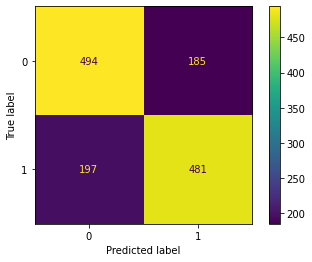

In [175]:
# visualize the confusion matrix
plot_confusion_matrix(knn_optimal_model, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.7849779086892489


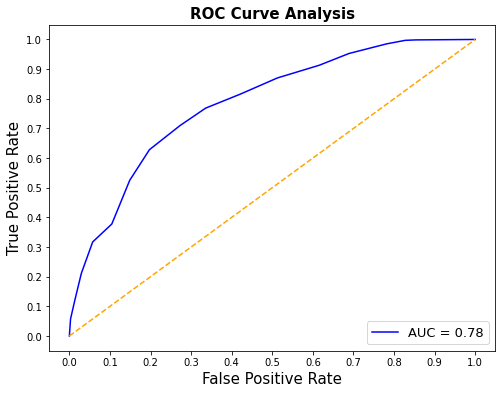

In [176]:
plot_roc_curve(y_test, test_proba_knn)

## **Support Vectors Classifier (SVC)**

In [88]:
# create SVC model
svc_model = SVC(probability=True)

# fitting model
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [89]:
# predicted classes
train_pred_svc = svc_model.predict(X_train)
test_pred_svc = svc_model.predict(X_test)

In [90]:
# Predicted Probability
test_proba_svc = svc_model.predict_proba(X_test)[:,1]

In [91]:
# train set accuracy score
accuracy_score(y_train,train_pred_svc)

0.6784573814787521

### **Model Evaluation**

In [92]:
# Evaluation metrics
evaluation_metrics(y_test, test_pred_svc, "SVC")

Evaluation Metrics on test data:
accuracy score: 0.6691230655858511
Precision: 0.682615629984051
Recall: 0.6312684365781711
f1 score: 0.6559386973180076


**Confusion Matrix**

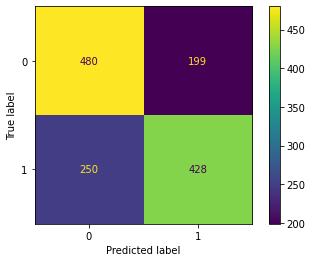

In [93]:
# visualize the confusion matrix
plot_confusion_matrix(svc_model, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.7290523544514969


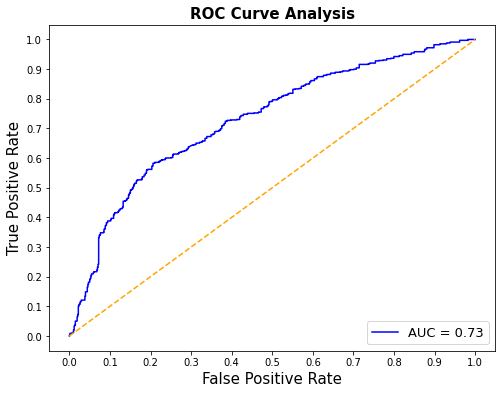

In [94]:
plot_roc_curve(y_test, test_proba_svc)

## **Decision Tree Classifier**

In [95]:
# hyperparameter grid
param_dict_dt = {'max_depth': [10, 15, 20, 25],
                 'min_samples_leaf': [30, 40, 50],
                 'criterion': ["gini", "entropy"]
                 }

In [96]:
# creating model instance
dt_clf= DecisionTreeClassifier(random_state=0)

# fitting model
dt_grid = GridSearchCV(dt_clf, param_dict_dt, scoring= 'accuracy', verbose=3, cv=5)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.704 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.716 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.662 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.720 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.683 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.708 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.698 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.7

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [30, 40, 50]},
             scoring='accuracy', verbose=3)

In [97]:
# best_parameters
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 30}

In [98]:
# optimal model
dt_optimal= dt_grid.best_estimator_

In [99]:
# predicted classes
train_pred_dt = dt_optimal.predict(X_train)
test_pred_dt = dt_optimal.predict(X_test)

In [100]:
# Predicted Probability
test_proba_dt = dt_optimal.predict_proba(X_test)[:,1]

In [101]:
# train set accuracy score
accuracy_score(y_train,train_pred_dt)

0.7730287398673544

### **Model Evaluation**

In [102]:
# Evaluation metrics on test set
evaluation_metrics(y_test, test_pred_dt, "DecisionTree")

Evaluation Metrics on test data:
accuracy score: 0.7266028002947679
Precision: 0.7183499288762447
Recall: 0.7448377581120944
f1 score: 0.7313540912382333


**Confusion Matrix**

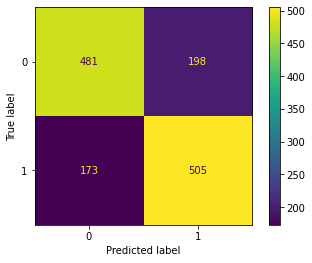

In [103]:
# visualize the confusion matrix
plot_confusion_matrix(dt_optimal, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.8151682806139516


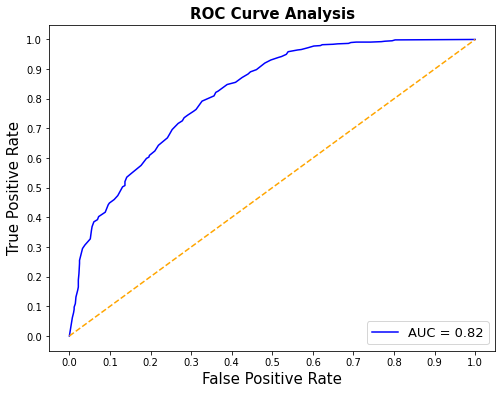

In [104]:
plot_roc_curve(y_test, test_proba_dt)

## **Random Forest Classifier**

In [105]:
# hyperparameter grid
param_dict_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [int(x) for x in np.linspace(3, 15, num = 13)],
    'min_samples_leaf': [10, 20, 30]
  }

In [106]:
# create RandomForestClassifier instance
rf_model= RandomForestClassifier(random_state=0)

# fitting model
rf_grid = RandomizedSearchCV(rf_model, param_dict_rf, cv = 3, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=20, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=20, n_estimators=200; total time=   0.6s
[CV] END .max_depth=9, min_samples_leaf=10, n_estimators=200; total time=   0.6s
[CV] END .max_depth=9, min_samples_leaf=10, n_estimators=200; total time=   0.7s
[CV] END .max_depth=9, min_samples_leaf=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=30, n_estimators=150; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=30, n_estimators=150; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=30, n_estimators=150; total time=   0.4s
[CV] END .max_depth=5, min_samples_leaf=20, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_leaf=20, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_leaf=20, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15],
                                        'min_samples_leaf': [10, 20, 30],
                                        'n_estimators': [100, 150, 200]},
                   verbose=2)

In [107]:
# best parameters
rf_grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 200}

In [108]:
# optimal model
rf_optimal= rf_grid.best_estimator_

In [109]:
# predicted classes
train_pred_rf = rf_optimal.predict(X_train)
test_pred_rf = rf_optimal.predict(X_test)

In [110]:
# Predicted Probability
test_proba_rf = rf_optimal.predict_proba(X_test)[:,1]

In [111]:
# train set accuracy score
accuracy_score(y_train,train_pred_rf)

0.8309997543601081

### **Model Evaluation**

In [112]:
# Evaluation metrics
evaluation_metrics(y_test, test_pred_rf, "RandomForest")

Evaluation Metrics on test data:
accuracy score: 0.8002947678703022
Precision: 0.7886524822695036
Recall: 0.8200589970501475
f1 score: 0.8040491684743312


**Confusion Matrix**

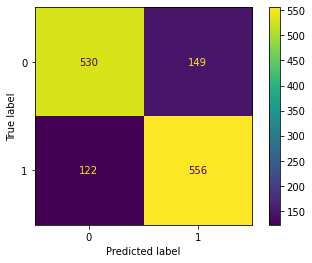

In [113]:
# visualize the confusion matrix
plot_confusion_matrix(rf_optimal, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.881856017655671


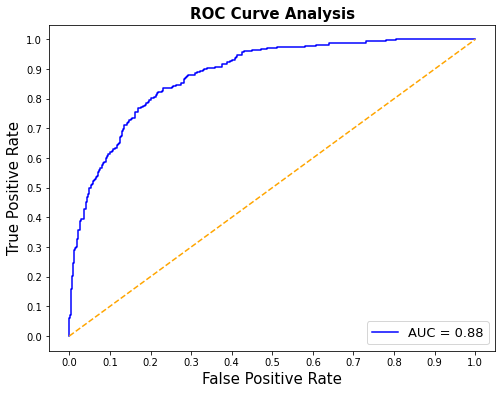

In [114]:
plot_roc_curve(y_test, test_proba_rf)

**Feature Importance**

In [115]:
rf_optimal.feature_importances_

array([0.26113222, 0.04336352, 0.07820688, 0.040521  , 0.13072929,
       0.19781512, 0.1258644 , 0.12236756])

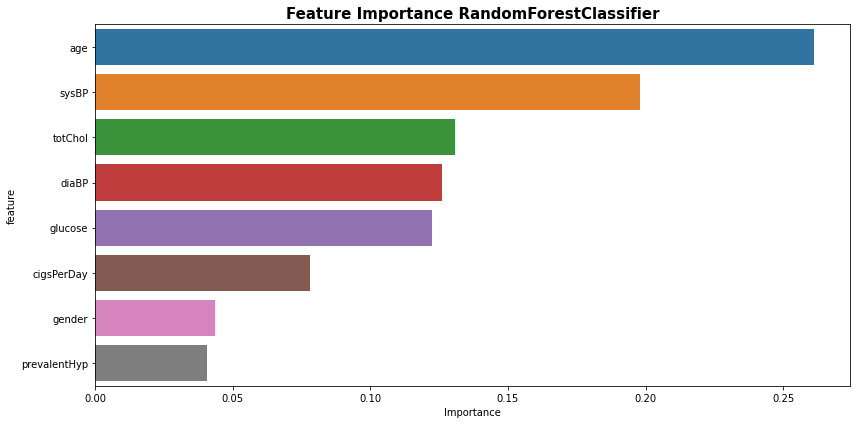

In [116]:
plot_feature_importance(rf_optimal,X)

## **Gradient Boosting**

In [134]:
# hyperparameter grid
param_dict_gb = {'min_samples_leaf':range(20,41,10),
                 'min_samples_split':range(30,51,10),
                 'max_features':range(5,9,1)}

In [151]:
# creating an gb model instance
gb_clf = GradientBoostingClassifier(learning_rate=0.2,max_depth=5,n_estimators=150, subsample=0.5, random_state=0)

# fitting gridsearch
gb_grid = RandomizedSearchCV(gb_clf, param_dict_gb, scoring='roc_auc', cv=5, verbose=2)
gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_features=8, min_samples_leaf=30, min_samples_split=50; total time=   1.4s
[CV] END max_features=8, min_samples_leaf=30, min_samples_split=50; total time=   1.1s
[CV] END max_features=8, min_samples_leaf=30, min_samples_split=50; total time=   1.1s
[CV] END max_features=8, min_samples_leaf=30, min_samples_split=50; total time=   1.1s
[CV] END max_features=8, min_samples_leaf=30, min_samples_split=50; total time=   1.1s
[CV] END max_features=7, min_samples_leaf=30, min_samples_split=30; total time=   1.0s
[CV] END max_features=7, min_samples_leaf=30, min_samples_split=30; total time=   1.0s
[CV] END max_features=7, min_samples_leaf=30, min_samples_split=30; total time=   0.9s
[CV] END max_features=7, min_samples_leaf=30, min_samples_split=30; total time=   0.7s
[CV] END max_features=7, min_samples_leaf=30, min_samples_split=30; total time=   0.6s
[CV] END max_features=7, min_samples_leaf=40, min_samples_split=40; t

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                        max_depth=5,
                                                        n_estimators=150,
                                                        random_state=0,
                                                        subsample=0.5),
                   param_distributions={'max_features': range(5, 9),
                                        'min_samples_leaf': range(20, 41, 10),
                                        'min_samples_split': range(30, 51, 10)},
                   scoring='roc_auc', verbose=2)

In [152]:
# best parameters
gb_grid.best_params_

{'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 40}

In [153]:
# optimal model
gb_optimal= gb_grid.best_estimator_

In [154]:
# predicted classes
train_pred_gb = gb_optimal.predict(X_train)
test_pred_gb = gb_optimal.predict(X_test)

In [155]:
# Predicted Probability
test_proba_gb = gb_optimal.predict_proba(X_test)[:,1]

In [156]:
# train set accuracy score
accuracy_score(y_train,train_pred_gb)

0.9680668140506018

### **Model Evaluation**

In [157]:
# Evaluation metrics
evaluation_metrics(y_test, test_pred_gb, "Gradient Boosting")

Evaluation Metrics on test data:
accuracy score: 0.8813559322033898
Precision: 0.8469798657718121
Recall: 0.9306784660766961
f1 score: 0.886858749121574


**Confusion Matrix**

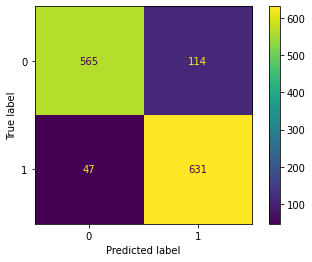

In [158]:
# visualize the confusion matrix
plot_confusion_matrix(gb_optimal, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.9482168380535317


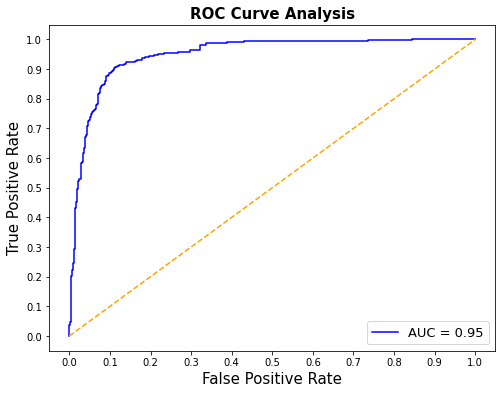

In [159]:
plot_roc_curve(y_test, test_proba_gb)

**Feature Importance**

In [160]:
gb_optimal.feature_importances_

array([0.19477585, 0.02900387, 0.07113977, 0.01194169, 0.18396418,
       0.21451415, 0.16125114, 0.13340935])

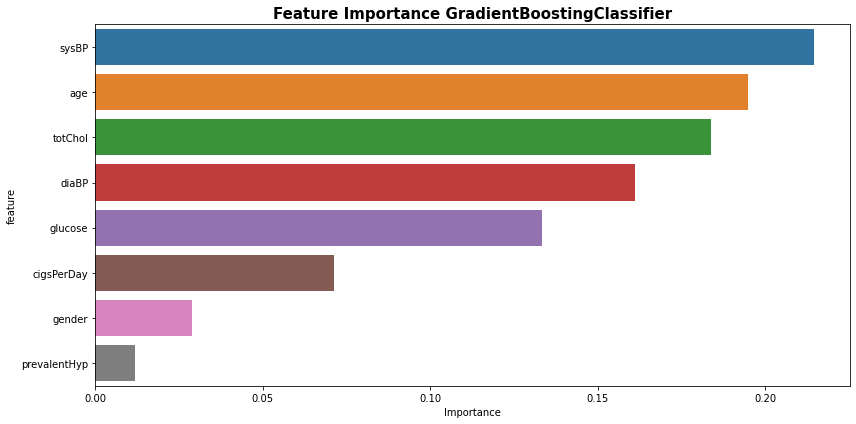

In [161]:
plot_feature_importance(gb_optimal,X)

# **Results**

In [162]:
results_df= pd.DataFrame(results).T.reset_index()
results_df.columns= ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score']
results_df

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.690494,0.688596,0.694690,0.691630
1,K-Nearest Neighbors,0.721444,0.714900,0.735988,0.725291
2,SVC,0.669123,0.682616,0.631268,0.655939
3,DecisionTree,0.726603,0.718350,0.744838,0.731354
4,RandomForest,0.800295,0.788652,0.820059,0.804049
5,Gradient Boosting,0.881356,0.846980,0.930678,0.886859


In [163]:
# function to add value labels
def addlabels(x,y):
  for i in range(len(x)):
    # y= round(y*100,2)
    plt.text(i, y[i],round(y[i],2), ha = 'center',
    Bbox = dict(facecolor = 'white', alpha = .5))

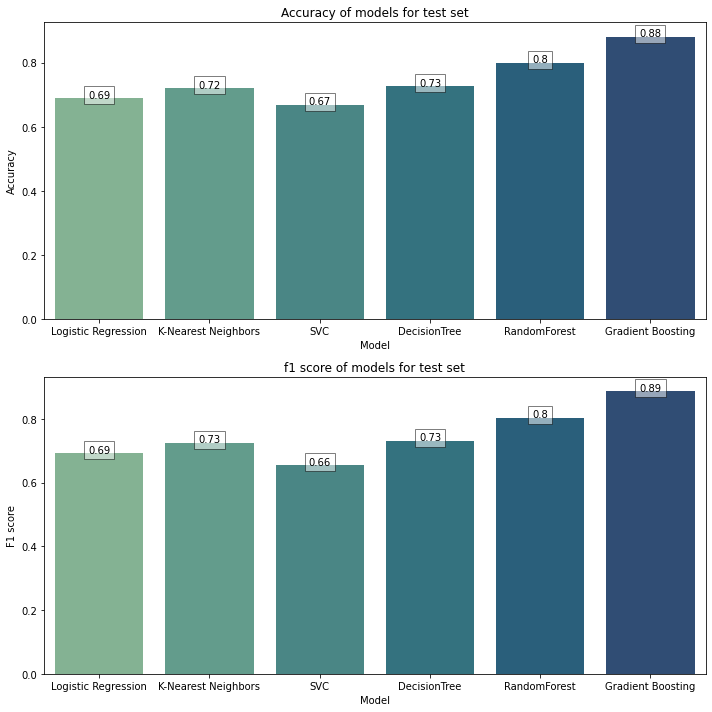

In [164]:
# plot accuracy and f1 score of models for testing set
# fig, ax = plt.subplots(figsize=(16,6))
plt.subplots(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.barplot(results_df['Model'],results_df['Accuracy'], palette="crest")
addlabels(results_df['Model'],results_df['Accuracy'])
plt.title('Accuracy of models for test set')

plt.subplot(2, 1, 2)
sns.barplot(results_df['Model'],results_df['F1 score'], palette="crest")
addlabels(results_df['Model'],results_df['F1 score'])
plt.title('f1 score of models for test set')

plt.tight_layout()
plt.show()

### **ROC Curve of all models**

In [165]:
classifiers_proba = [(lr_clf, test_proba_lr),
                     (knn_optimal_model, test_proba_knn),
                     (svc_model, test_proba_svc),
                     (dt_optimal, test_proba_dt),
                     (rf_optimal, test_proba_rf),
                     (gb_optimal, test_proba_gb)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

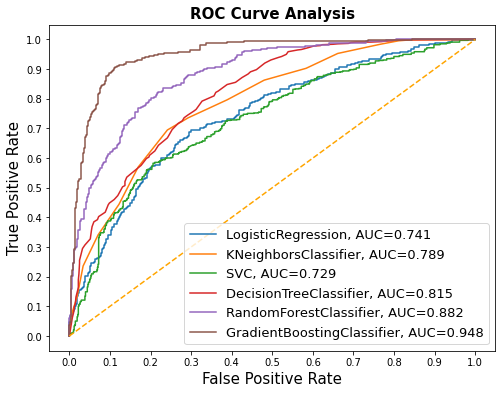

In [166]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Conclusion**

Cardiovascular disease is a major public health problem in India, often impacting the most productive years of an individual’s life. Therefore, predicting the disease before becoming infected decreases the risk of death. This prediction is an area that is widely researched. We tried six classification modeling techniques on a real data set of residents of the town of Framingham.

Result showed that the Gradient Boosting classifier has the best accuracy of 88%, whereas Logistic regression being the least accurate model. We also used ROC curve analysis to evaluate models and found that again Gradient Boosting model has best auc score of 0.948 which is pretty good. The GradientBoostingClassifier is found to be the best model. Therefore, Gradient Boosting model can be used to predict risk of CHD.

Variable importance analysis showed that age, systolic BP, total cholesterol and glucose level(diabetes) are the most influential features to predict whether the patient has a 10-year risk of future coronary heart disease.